**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1fX9vr1W-W4Z9iEnoNn8ujwuoGIeoDeIA?usp=sharing)


Сегодня мы изучим нейронные сети seq2seq (Sequence-2-Sequence). Рассмотрим, зачем они нужны, где применяются и как работают. 


###Последовательность

Математическое определение последовательности выглядит так: 
> **Последовательность** — это пронумерованный набор каких-либо объектов, среди которых допускаются повторения. Причем порядок объектов имеет значение. Нумерация чаще всего происходит натуральными числами от нуля до бесконечности.

Примерами последовательности могут служить:
- дома на улице;
- буквы в слове;
- слова в предложении;
- кадры в фильмы;
- звуки в слове.

Если вы, например, перемешаете все кадры в фильме, то сюжет будет утерян. Или перемешаете листья, ветки, ствол и корни дерева, и получите уже другой вид растительности.


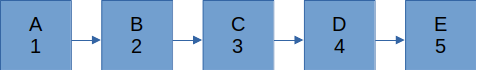

Часто встречаются задачи получить из одной последовательности — другую. Например:
* из английского предложения — русское (задача перевода);
* из вопроса — ответ (чат-боты);
* из статьи — аннотацию;
* из кадров фильма — описание действия;
* из звуков — текстовое содержание (задача speech to text);
* из слов в предложении — звуки (задача text to speech).

Все эти задачи можно решить с помощью нейронных сетей.


###Освежим некоторые знания по рекуррентным нейронным сетям

Люди не начинают думать с чистого листа каждую секунду. Читая этот пост, вы понимаете каждое слово, основываясь на понимании предыдущего слова. Мы не выбрасываем из головы все и не начинаем думать с нуля. Наши мысли обладают постоянством.

Традиционные нейронные сети не обладают этим свойством, и в этом их главный недостаток. Представим, например, что мы хотим классифицировать события, происходящие в фильме. Непонятно, как традиционная нейронная сеть могла бы использовать рассуждения о предыдущих событиях фильма, чтобы получить информацию о последующих.

Эту проблему решают рекуррентные нейронные сети (Recurrent Neural Networks, RNN). Это сети, содержащие обратные связи и позволяющие сохранять информацию.

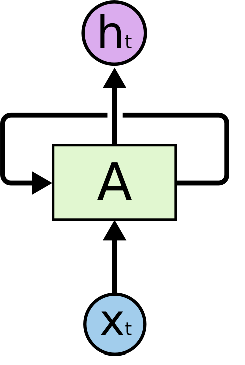

На схеме выше фрагмент нейронной сети `A` принимает входное значение `X(t)` и возвращает значение `h(t)`. Наличие обратной связи позволяет передавать информацию от одного шага сети — к другому.

Часто рекуррентную сеть представляют как несколько копий одной и той же сети, каждая из которых передает информацию последующей копии. Вот, что произойдет, если мы развернем обратную связь:


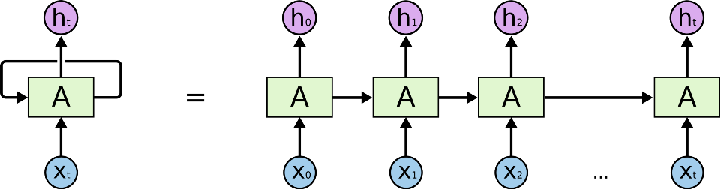

То, что RNN напоминают цепочку, говорит о том, что они тесно связаны с последовательностями и списками. RNN – самая естественная архитектура нейронных сетей для работы с данными такого типа. Немалая роль в этих успехах принадлежит LSTM – необычной модификации рекуррентной нейронной сети, которая на многих задачах значительно превосходит стандартную версию. Почти все впечатляющие результаты RNN достигнуты именно с помощью LSTM.

Вспомним **LSTM (long short-term memory)**, дословно «долгая краткосрочная память» — тип рекуррентной нейронной сети, способной обучаться долгосрочным зависимостям. LSTM специально разработаны для устранения проблемы исчезающего градиента. Их специализация — запоминание информации в течение длительных периодов времени. Разберемся со входами-выходами. 

На вход поступают:

- очередной элемент входной последовательности `x(t)`;
- значение внутреннего состояния `h(t)`;
- выходное значение, полученное от обработки предыдущих элементов последовательности `x(t-1)`.

На выходе имеем:

- значение внутреннего состояния LSTM после обработки очередного элемента входной последовательности `h(t)`;
- выходное значение, полученное от обработки нового и всех предыдущих элементов последовательности `x(t)`.

Выход элемента зависит от того, какой объем информации необходимо забыть, сохранить или обновить из входных данных. Все эти процессы настраивают в процессе обучения LSTM.


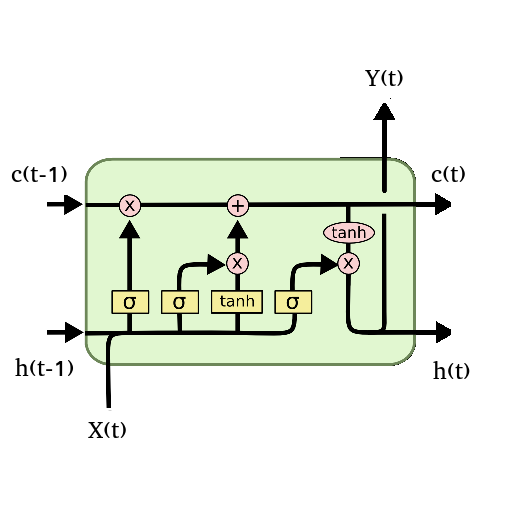

### Embedding

**Embedding** — представление слов и документов (узла в графе, кусочка картинки, слова или его токена) в виде некоторого n-мерного вектора. 

Это лучше, чем традиционные схемы кодирования мешков слова (BOW). У них большие разреженные векторы использовались для представления каждого слова или для оценки каждого слова в векторе для представления всего словаря. Эти представления были редкими, потому что словари были обширными, и данное слово или документ был бы представлен большим вектором, состоящим в основном из нулевых значений.

Вместо этого слова в Embedding представлены векторами, где вектор представляет проекцию слова в непрерывное векторное пространство.

При использовании Embedding слова (текст) подвергают токенизации (индексированию), преобразованию к one-hot encoding и сопоставлению с вектором n-мерного пространства. 

Пример: 

> «Кот» -> 5  -> (0.432, 0.333, -0.555, 0.245, - 0.666)

Для разных языков разработаны готовые Embedding-словари. Хотя их можно получать и самим в процессе обучения нейронной сети.

RNN часто обучают на словах, переведенных в Embedding. 

Отвлечемся на подготовку данных для обучения и работы нейронной сети:

1. Отправляем наши английские тексты стандартному токенайзеру. Токенайзер индексирует все найденные слова, например
Black cat catch mouse — это `45 32 11 2`. Индексы случайные.
2. Дополняем вектор нулями до получения длины установленного размера, например `45 32 11 2 0 0 0 0 0 0 0 0 0`. Теперь их можно отдать кодеру для обучения.
3. Дополняем тексты для декодера  специальными словами: `< start >` в начале и `< stop >` в конце. Эти слова научат декодер начинать генерацию при появлении `< start >`  и сообщать нам словом `< stop >`, что фраза полностью выдана.
Здесь есть тонкий момент: обучаем декодер фразой типа `< start >` Черная кошка ловит мышку `< stop >`. Но получаем в ответ: Черная кошка ловит мышку `< stop >`. В самом деле, зачем декодеру выдавать `< start >`?
4. И также отдаем токенайзеру. При работе декодеру отдаются векторы состояния кодера и фраза `< start >`. Далее ждем от него ответ.

### Базовая модель нейронной сети для решения задач seq2seq

Модель состоит из двух рекуррентных нейронных сетей: encoder (кодер, он же энкодер), который обрабатывает входные данные и decoder (декодер), который генерирует данные вывода. 


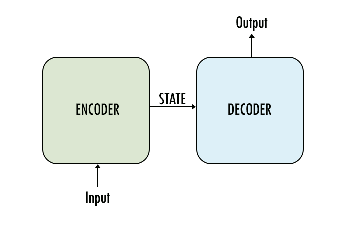

**Обычно, но не обязательно:**

- И кодировщик, и декодер — это модели LSTM (или иногда модели GRU).
- Кодировщик считывает входную последовательность и суммирует информацию в виде того, что называется векторами внутреннего состояния. В случае LSTM они называются векторами скрытого состояния и состояний ячеек. Мы отбрасываем выходы энкодера и сохраняем только внутренние состояния.
- Декодер — это LSTM, начальные состояния которого инициализируются конечными состояниями кодировщика LSTM. Используя эти начальные состояния, декодер начинает генерировать выходную последовательность.
- Декодер по-разному используют во время обучения и предсказания. Во время обучения мы используем технику принудительного вызова учителя, которая помогает быстрее обучить декодер. При обучении входные данные декодера на каждом временном шаге становятся обучающими данными предыдущего временного шага.
- Кодировщик суммирует входную последовательность в векторы состояния (их еще называют векторами мысли). Затем они передаются в декодер, который начинает генерировать выходную последовательность.


### Кодировщик LSTM

В простейшем случае кодировщик — это LSTM-сеть. Он часто дополняется Embedding-слоем. В развернутом виде сеть может быть представлена следующим образом:


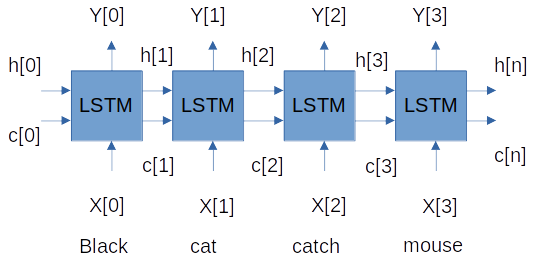

LSTM считывает элементы последовательности один за другим. Таким образом, если вход представляет собой последовательность длины `k`, мы говорим, что LSTM считывает ее за `k` временных шагов (аналог цикла `for` с `k` итерациями). 

На каждом шаге считывания последовательности LSTM можно выделить векторы: 
- `X[i] =>` — входная последовательность на временном шаге `i`;
- `h[i]` и `c[i] => LSTM` поддерживают два состояния (`h` для скрытого состояния и `c` для состояния ячейки) на каждом временном шаге. В совокупности это внутреннее состояние LSTM на временном шаге `i`;
- `Y[i] =>` — выходная последовательность на временном шаге `i`.

Разберемся со всеми векторами. Напомним, что наша задача — перевести английское предложение на русский язык. Например, у нас есть следующее предложение на английском: Black cat catch mouse. Выходное предложение на русском: черная кошка ловит мышку. 

Предложение на английском языке может быть представлено в виде последовательности слов или символов. Например, в случае слов, приведенное выше предложение на английском языке можно представить как последовательность из четырех слов: black, cat, catch, mouse. В случае символов это можно представить как последовательность из 18 символов: b, l, a, c, k и так далее. Мы будем разбивать предложение на слова, так как эта схема более распространена в реальных приложениях. 

Обращаясь к диаграмме выше, у нас есть следующие входные данные: `X1 = Black`, `X2 = cat`, `X3 = catch`, `X4 = mouse`. LSTM прочитает это предложение слово за словом за четыре временных шага, как показано выше.

Рассмотрим  `h[i]` и `c[i]`. Эти внутренние состояния на каждом временном шаге запоминают то, что LSTM прочитал (изучил) до сих пор. Например, `h3`, `c3`. Эти два вектора помнят, что сеть до сих пор считывала Black cat catch. Можно сказать, что это сводка информации (смысл начала предложения) до третьего временного шага. 

Точно так же мы можем сказать, что `h[4]`, `c[4]` содержит сводку всего входного предложения, поскольку именно здесь предложение заканчивается (на четвертом временном шаге). Эти состояния, полученные на последнем временном шаге, также называют векторами мысли, поскольку они суммируют всю информацию из предложения в векторной форме. Что касается `h[0]`и `c[0]`, то эти векторы обычно инициализируются нулем, поскольку модель еще не начала считывать входные данные. 

**Примечание:** размер этих векторов равен количеству единиц (нейронов), используемых в ячейке LSTM.


### Декодер LSTM: режим обучения

В отличие от кодировщика LSTM, который играет одинаковую роль как на этапе обучения, так и на этапе вывода, декодер LSTM играет несколько разную роль на обоих этапах. В этом разделе мы попытаемся понять, как настроить декодер на этапе обучения, а в следующем — поймем, как его использовать во время вывода. 

Напомним, что, учитывая введенное предложение Black cat catch mouse, цель процесса обучения — обучить (научить) декодер выводить «черная кошка ловит мышку». Подобно тому, как кодер сканировал входную последовательность слово за словом, точно так же и декодер генерирует выходную последовательность слово за словом. Рассмотрим схему ниже:

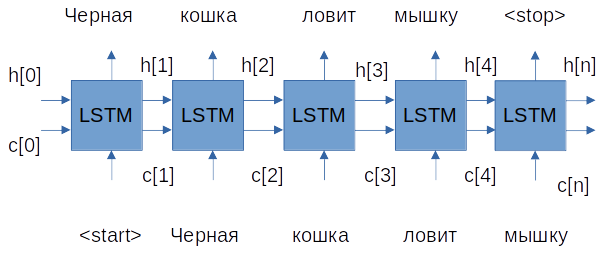

**Важный момент**: начальные состояния (`h0`, `c0`) декодера инициализируются конечными состояниями кодера. Это интуитивно означает, что перед началом обучения декодер получает всю информацию о переводимой фразе от кодера в виде `h0`, `c0`. 

На первом временном шаге мы подаем токен `< start >`, чтобы декодер начал генерировать следующий токен (фактическое первое слово предложения на русском). В этом шаге учим декодер генерировать слово «черная».

После последнего слова в предложении на русском мы заставляем декодер научиться предсказывать токен `<stop>`. Это будет использоваться в качестве условия остановки во время процедуры вывода и обозначать конец переведенного предложения. Здесь мы остановим цикл вывода. 

Наконец, потери рассчитываются на основе прогнозируемых выходных данных для каждого временного шага, а ошибки распространяются обратно во времени, чтобы обновить параметры сети. Обучение сети в течение длительного периода с использованием достаточно большого количества данных приводит к хорошим прогнозам (переводам), но требуют существенных вычислительных затрат.


Весь процесс обучения (кодировщик + декодер) можно резюмировать на диаграмме ниже:


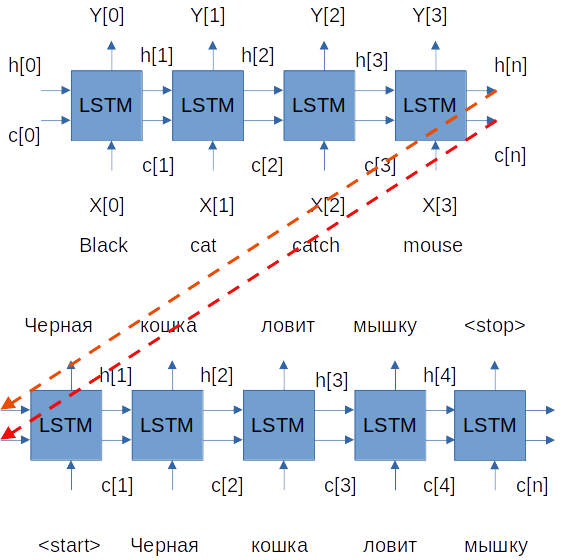

### Декодер LSTM: рабочий режим


Разберемся в настройке, необходимой для вывода. Как уже говорилось, кодировщик LSTM играет ту же роль, читая входную последовательность (английское предложение) и генерируя векторы мыслей (`hk`, `ck`).

Декодер теперь должен предсказать всю выходную последовательность (предложение на русском) с учетом этих мысленных векторов. Попробуем наглядно разобраться на том же примере. Последовательность ввода: 

=> Black cat catch mouse (ожидаемая) выходная последовательность => Черная кошка ловит мышку

На это понадобится три шага.

Шаг 1. Кодируем входную последовательность в векторы `h[k]`, `c[k]`:

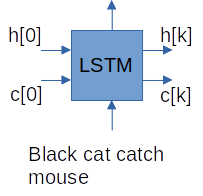

Заметим, что в начале работы на LSTM подаются нулевые `h` и `с`. В конце после обработки всей фразы получаем конечные векторы `h[k]`, `c[k]`, которые мы используем для инициализации декодера.


Шаг 2. Начнем генерировать выходную последовательность в цикле, слово за словом:

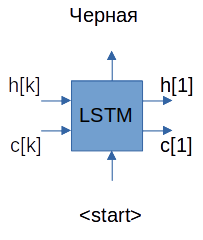

Подаем на декодер значения `h[1]`, `c[1]` и слово, предсказанное на предыдущем шаге.

Шаг 3:

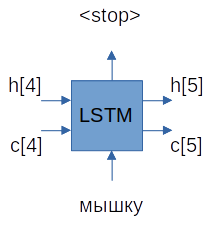

На последнем шаге на выходе декодера получаем токен `<stop>`.Все, генерация фразы окончена. Собираем фразу из слов, полученных ранее.


### Алгоритм получения выходной последовательности 

* Во время вывода мы генерируем по одному слову за цикл. Таким образом, декодер LSTM вызывается в цикле, каждый раз обрабатывая только один временной шаг. 

* Начальные состояния декодера устанавливаются из конечных состояний кодера. 

* Первоначальный вход в декодер — всегда токен `<start>`. 

* На каждом временном шаге мы сохраняем состояния декодера и устанавливаем их как начальные состояния для следующего временного шага. 

* На каждом временном шаге прогнозируемые выходные данные используются в качестве входных данных на следующем временном шаге. 

* Мы прерываем цикл, когда декодер предсказывает токен `<stop>`. 

Работу декодера можно отобразить на диаграмме ниже:


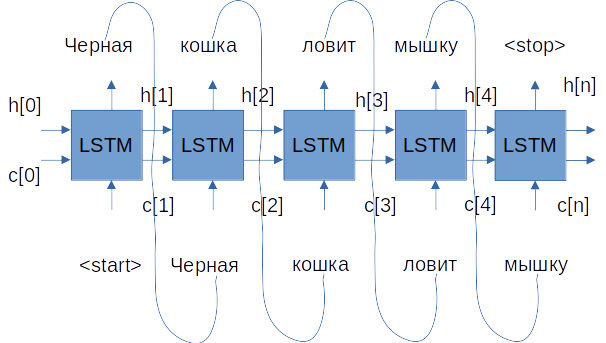

**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1fX9vr1W-W4Z9iEnoNn8ujwuoGIeoDeIA?usp=sharing)
